ML-AI Assignment

Bootcamp session 2023-01-28

T N Arjun Raj

### ANLAYSING THE GIVEN DATASET 

In [483]:
import pandas as pd
import numpy as np

df=pd.read_csv('titanic.csv')

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [484]:
df_nan=df.shape[0]-df.count()
print(df_nan) ### number of nan values each column
too_many_nan_col_list=[i for i in df_nan.index if df_nan[i]> 0.4*df.shape[0]]  ### these columns have more than 50% of its values as NaN; so it cannot be meaningfully imputed

print( '\nThe following columns have more than 40% of its values as NaN; so it cannot be meaningfully imputed. Therefore the following column(s) should be dropped:-')
print(too_many_nan_col_list)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The following columns have more than 40% of its values as NaN; so it cannot be meaningfully imputed. Therefore the following column(s) should be dropped:-
['Cabin']


In [485]:
df_unique=df.nunique()
print(df_unique) ### to determine if there any columns that have all identical values

all_unique_col_list=[i for i in df_nan.index if df_unique[i]==df.shape[0]] ## these columns have a unique value for every instance so they do not present any information that causes the instance to be linked to its target column value
print('\nThese columns have a unique value for every instance so they do not present any information that causes the instance to be linked to its target column value (unless further feature engineering is done to split the data in this column into several meaningful columns for which more than one instance would share a common value ) :- ', all_unique_col_list)

one_unique_col_list=[i for i in df_nan.index if df_unique[i]==1]
print('\nThese columns have only one unique value for every instance so they do not present any meaningful information that causes the instance to be linked to its target column value:- ', one_unique_col_list)


PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

These columns have a unique value for every instance so they do not present any information that causes the instance to be linked to its target column value (unless further feature engineering is done to split the data in this column into several meaningful columns for which more than one instance would share a common value ) :-  ['PassengerId', 'Name']

These columns have only one unique value for every instance so they do not present any meaningful information that causes the instance to be linked to its target column value:-  []


In [486]:
### removing duplicated columns (by looking for same column name, not column values), if any
df = df.loc[:,~df.columns.duplicated()].copy()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [487]:
### removing duplicated rows
if df.duplicated().any():
    df.drop_duplicates(inplace=True)


In [488]:
### removing unwanted columns and rows:-
exclude_col_list=too_many_nan_col_list + all_unique_col_list +one_unique_col_list 

df=df.drop(exclude_col_list,axis=1)
    

print('dropping these columns from the dataframe because they are not helpful for the machine learning task:-\n ',exclude_col_list)
df

dropping these columns from the dataframe because they are not helpful for the machine learning task:-
  ['Cabin', 'PassengerId', 'Name']


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.0,0,0,111369,30.0000,C


In [489]:
#### Identifying the target column:-
target_col='Survived'

In [490]:
### separate target and features

X_df,y_df=df.drop(labels=[target_col],axis=1),df[target_col]
print(X_df.columns.to_list())

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']


In [491]:
### to remove highly correlated cols because they provide redundant information
high_corr=1


### a function to get feature pairs that have high correlation 
def get_high_corr_column_pairs(df,high_corr=1,suppress_verbose_output=False):
    corr_df=df.corr()
    corr_df_ndarray=corr_df.values

    ## remove lower half triangle of repeated values ; so that the same columns pairs do not appear twice
    for i in range(corr_df_ndarray.shape[0]):
        j=i
        while j>=0:
            corr_df_ndarray[i][j]=np.NaN
            j=j-1
    
    ## condition to get columns pairs that have high correlation
    high_corr_index_bool= ((corr_df_ndarray > high_corr) | (corr_df_ndarray < -high_corr)) & (corr_df_ndarray != float(1))

    high_corr_index_list=np.argwhere(high_corr_index_bool)
    high_corr_columns_list=[]
    if suppress_verbose_output==False:
        if len(high_corr_index_list)==0:
            print('There are no highly correlated columns')
        else:
            print('columns with high correlation are :- ')

    for ind,tup in enumerate(high_corr_index_list):
        high_corr_columns_list.append((corr_df.index[tup[0]],corr_df.columns[tup[1]],np.round_(corr_df_ndarray[tup[0],tup[1]],decimals=3)))
        if suppress_verbose_output==False:
            print(corr_df.index[tup[0]],' has a signifcant correlation of', np.round_(corr_df_ndarray[tup[0],tup[1]],decimals=3),'with', corr_df.columns[tup[1]])
    return high_corr_columns_list
    
high_corr_column_pairs=get_high_corr_column_pairs(X_df,high_corr=high_corr,suppress_verbose_output=False)

for tup in high_corr_column_pairs:
    X_df.drop(tup[0],axis=1)


There are no highly correlated columns


In [492]:
### convert to numpy array inorder to use functions in sklearn library
X=X_df.values
y=y_df.values

### create a dictionary to convert column names of the dataframe to indices of the np.array X
col_name_to_ind_convert_X_dict=dict([(v,k) for k,v in dict(enumerate(X_df.columns.to_list())).items()])
print(col_name_to_ind_convert_X_dict)


{'Pclass': 0, 'Sex': 1, 'Age': 2, 'SibSp': 3, 'Parch': 4, 'Ticket': 5, 'Fare': 6, 'Embarked': 7}


### separate train and test data

In [493]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)



### Imputation

In [494]:
print('total number of NaN in the array X_train before imputation :- ',(X_train!=X_train).sum())

## to decide which cols require imputation

need_imputation_cols_list=[j for j in X_df.columns.to_list() if not(X_df.count()[j]==X_df.shape[0])]
print('Only the following columns have missing values :-',need_imputation_cols_list)



total number of NaN in the array X_train before imputation :-  146
Only the following columns have missing values :- ['Age', 'Embarked']


In [495]:
### categorise features into different types to decide which statistical imputation strategy to use


### separate into numerical columns and non-numeric columns
X_df_num=X_df.select_dtypes(np.number)
num_feature_cols_list=X_df_num.columns.to_list()
non_num_feature_cols=[i for i in X_df.columns if i not in X_df_num.columns]

mode_impute_strategy_cols_list=[]
median_impute_strategy_cols_list=[]
for col in X_df.columns:
    if float(X_df.nunique()[col]) < 0.1*X_df.shape[0]: ### use most_frequent strategy for statistical imputation when the number of unique values in the column are few (< 10% of the total values)
        mode_impute_strategy_cols_list.append(col)
    elif col in X_df_num.columns:
        median_impute_strategy_cols_list.append(col)
    else:
        mode_impute_strategy_cols_list.append(col)
print('list of columns to use mode strategy of statistical imputation for ; use mode strategy for either columns that are non-numerical or for columns that are numerical but only have a few unique values (<10% no. of instances) :- \n'
      ,mode_impute_strategy_cols_list) #### list of columns to use mode strategy of statistical imputation for ; use mode strategy for either columns that are non-numerical or for columns that are numerical but only have a few unique values (<10% no. of instances)
print('list of columns to use median strategy of statistical imputation for ; use for numeric columns for which mode strategy is not ideal:- \n',
      median_impute_strategy_cols_list) #### list of columns to use median strategy of statistical imputation for ; use for numeric columns for which mode strategy is not ideal



list of columns to use mode strategy of statistical imputation for ; use mode strategy for either columns that are non-numerical or for columns that are numerical but only have a few unique values (<10% no. of instances) :- 
 ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Embarked']
list of columns to use median strategy of statistical imputation for ; use for numeric columns for which mode strategy is not ideal:- 
 ['Fare']


In [496]:
### imputing training data and testing data 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

### list of columns for which most_frequent imputation is to be done:- 
cols_to_impute_mode_strategy=[i for i in need_imputation_cols_list if i in mode_impute_strategy_cols_list]



'''
(I wrote this function as an alternative for the ColumnTransformer class 
because the ColumnTransformer class mixes up the Columns after transforming ;
therefore there is no easy way to know which columns in the ndarray correspond 
to which columns in the original dataframe)

The function extracts specified columns from that dataset; runs a transformation on the columns 
(eg. SimpleImputer, OneHotEncoder etc.) ; then substitutes back the transformed columns in the original data set X_train 
 
The transformers argument of this function mimics the structure of the transformers argument of the ColumnTransformer class
'''
def my_seq_col_transformer(transformers,X_train_fn_var,X_test_fn_var,fit_test=False):
    
    X_train_fn_var=X_train_fn_var.copy()
    X_test_fn_var=X_test_fn_var.copy()
    
    
    result_list=[]
    for ind,tup in enumerate(transformers):
        if not ind==0:
            print('please do not use multiple transformers; the function might not be ready for use with multiple transformer tuples')
            ## 
            
        '''
        The transformers argument of this function mimics the structure 
        of the transformers argument of the ColumnTransformer class
        '''
        operation_class=tup[1]
        cols_to_transform_list=tup[2]
        
        cols_to_transform_ind_list=[col_name_to_ind_convert_X_dict[col_name] for col_name in cols_to_transform_list ]
        
        X_train_fn_var_few_cols_transformed=operation_class.fit_transform(X_train_fn_var[:,cols_to_transform_ind_list])
        
        
        '''
        whether to fit the test data and then transform or transform without fitting the test data; 
        fitting is required for encoding since the test data can have values that are not there in the training data
        '''
        if fit_test: 
            X_test_fn_var_few_cols_transformed=operation_class.fit_transform(X_test_fn_var[:,cols_to_transform_ind_list])
        else: 
            X_test_fn_var_few_cols_transformed=operation_class.transform(X_test_fn_var[:,cols_to_transform_ind_list])

        
        for ind,col_ind in enumerate(cols_to_transform_ind_list):
            X_train_fn_var[:,col_ind]=X_train_fn_var_few_cols_transformed[:,ind]
            X_test_fn_var[:,col_ind]=X_test_fn_var_few_cols_transformed[:,ind]
            
        result_list.append((X_train_fn_var, X_test_fn_var, operation_class,type(operation_class).__name__))
    
    '''
    returns a list with tuples of the following form
    (transformed X_train, transformed X_test, operation_class,type(operation_class).__name__)
    '''    
    return result_list


result_list=my_seq_col_transformer(transformers=[('mode_imputer',SimpleImputer(strategy='most_frequent'),cols_to_impute_mode_strategy)],X_train_fn_var=X_train,X_test_fn_var=X_test)

### assign the transformed data to original data
X_train=result_list[-1][0]
X_test=result_list[-1][1]


if (X_train!=X_train).sum()==0:
    print('total number of nan values in X_train is 0. Imputation process successfully done.')


total number of nan values in X_train is 0. Imputation process successfully done.


### Outlier detection

In [497]:

X_train_num=X_train[:,num_feature_cols_ind_list]



### do not remove outliers from columns that have too few unique values to begin with :-
num_cols_with_enough_unique_values=[col_name for col_name in num_feature_cols_list if X_df.nunique()[col_name] > 0.1*X_df.shape[0]]

cols_list_to_detect_outliers=num_cols_with_enough_unique_values
cols_list_to_detect_outliers_ind_list=[col_name_to_ind_convert_X_dict[col_name] for col_name in cols_list_to_detect_outliers ]

print('Detect outliers only from these columns:- ',cols_list_to_detect_outliers)
outlier_list=[]
for ind in cols_list_to_detect_outliers_ind_list:
    col_arr=X_train[:,ind]
    q1=np.percentile(col_arr,25)
    q3=np.percentile(col_arr,75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    for elem_row_num,elem in enumerate(col_arr.flatten()):
        if elem <lower or elem > upper :
            outlier_list.append((elem_row_num,ind,elem))
print(len(outlier_list))
print('In this particular dataset, the "Fare" is a feature for which extreme values are expected - there could be very rich or very poor passengers. Therefore it may be unwise to remove these outliers.')        


Detect outliers only from these columns:-  ['Fare']
98
In this particular dataset, the "Fare" is a feature for which extreme values are expected - there could be very rich or very poor passengers. Therefore it may be unwise to remove these outliers.


### ENCODING CATEGORICAL COLUMNS

In [498]:
### categorise categorical-feature cols into different types to do various types of encoding
print('Categorical feature cols are : ',non_num_feature_cols)

### identify which categorical features are nominal and ordinal
nominal_features_list=['Sex','Ticket','Embarked'] ### .(manual) 
ordinal_features_list=[]


Categorical feature cols are :  ['Sex', 'Ticket', 'Embarked']


In [499]:
# ### ordinal feature encoding 
if not len(ordinal_features_list)==0:

    from sklearn.preprocessing import OrdinalEncoder

    result_list=my_seq_col_transformer(transformers=[('ordinal_enc',OrdinalEncoder(),ordinal_features_list)],X_train_fn_var=X_train,X_test_fn_var=X_test,fit_test=True)

    ### assign the transformed data to original data
    X_train=result_list[-1][0]
    X_test=result_list[-1][1]




In [500]:
# ### nominal feature encoding using dummy variable encoding
if not len(nominal_features_list)==0:

    from sklearn.preprocessing import OneHotEncoder

    result_list=my_seq_col_transformer(transformers=[('dummy_encoder',OneHotEncoder(drop='first'),nominal_features_list)],X_train_fn_var=X_train,X_test_fn_var=X_test,fit_test=True)

    ### assign the transformed data to original data
    X_train=result_list[-1][0]
    X_test=result_list[-1][1]

X_train.shape


(712, 8)

### label encoding
#### not needed for the current dataset

### FEATURE SCALING

In [501]:
 


### NORMALIZATION
X_train_before_normalisation=X_train.copy()
X_test_before_normalisation=X_test.copy()

cols_to_normalise=[i for i in num_feature_cols_list if ((i not in nominal_features_list ) and (i!=target_col)) ]

from sklearn.preprocessing import MinMaxScaler

result_list=my_seq_col_transformer(transformers=[('minmaxscaler',MinMaxScaler(),cols_to_normalise)], X_train_fn_var=X_train, X_test_fn_var=X_test)

### CREATE a copy of the dataset for which normalisaton is employed as the scaling method
X_train_normalised=result_list[-1][0].copy() 
X_test_normalised=result_list[-1][1].copy()

### Standardisation:

cols_to_standardise=[i for i in num_feature_cols_list if ((i not in nominal_features_list ) and (i not in ordinal_features_list) and (i!=target_col)) ]

from sklearn.preprocessing import StandardScaler

result_list=my_seq_col_transformer(transformers=[('standardscaler',StandardScaler(),cols_to_standardise)], X_train_fn_var=X_train_before_normalisation, X_test_fn_var=X_test_before_normalisation)

### CREATE a copy of the dataset for which standardisation is employed as the scaling method
X_train_standardised=result_list[-1][0].copy()
X_test_standardised=result_list[-1][1].copy()





array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>, <AxesSubplot:>]], dtype=object)

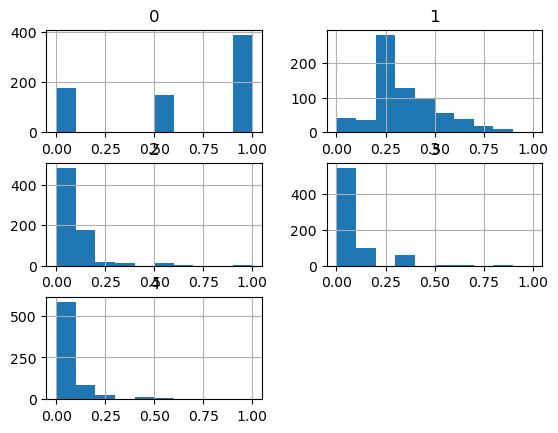

In [502]:
### HISTOGRAMS for normalised and standardised columns:-


# print(X_train_standardised[:,[0,2,3,4,6]]) ## [0,2,3,4,6] are columns that are not sparse matrices
cols_normalised_ind_list=[col_name_to_ind_convert_X_dict[col_name] for col_name in cols_to_normalise ]
df_scaled_n=pd.DataFrame(X_train_normalised[:,cols_normalised_ind_list].astype(np.float64))
df_scaled_n.hist() ### histgrams after normalisation


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>, <AxesSubplot:>]], dtype=object)

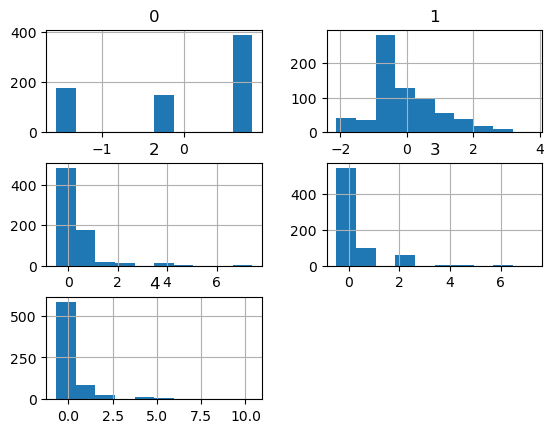

In [503]:
cols_standardised_ind_list=[col_name_to_ind_convert_X_dict[col_name] for col_name in cols_to_standardise ]


df_scaled_s=pd.DataFrame(X_train_standardised[:,cols_standardised_ind_list].astype(np.float64))
df_scaled_s.hist() ### histgrams after standardisation